# Project: TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Conclusions">Conclusions </a></li>
</ul>

<a id='intro'></a>
## Introduction

#### This data set contains information about 10,000 movies collected from The Movie Database TMDb (https://www.kaggle.com/tmdb/tmdb-movie-metadata) 
This is a great place to start digging in to those questions, with data on the crew, budget, and revenues of several thousand films.
variables included:
    - user ratings
    - revenue
    - popularity
    - budget
    - original_title
    - director
    - runtime
    - genres
    - release_year
    - vote_average

## We are going to try to answer the following Questions:

    1 - Question 1: Which movies are most popular?
    2 - Question 2: What kinds of properties are associated with movies that have high revenues?
    3 - Question 2: What kind of directors made the highly rated movies?    
    
through the Exploration popularity and revenue will be the dependent variables and runtime, release_year and genres will be independent variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

##### checking the null values

In [4]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
df[df['director'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,tt4073952,0.126594,0,0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000e+00,0.000000e+00
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000e+00,0.000000e+00
556,321160,tt3908634,0.100910,0,0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000e+00,0.000000e+00
1032,259910,tt3591568,0.291253,0,0,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,NaN,-,...,A look at the story behind Marvel Studios and ...,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000e+00,0.000000e+00
1054,253675,tt3711030,0.269468,0,0,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,NaN,NaN,...,Explore how writers Steven Moffat and Mark Gat...,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.000000e+00,0.000000e+00
1203,256561,tt3203290,0.119891,150000,0,Free to Play,Benedict Lim|Danil Ishutin|Clinton Loomis,http://www.freetoplaythemovie.com,NaN,One game will change their lives.,...,Follow three professional video game players a...,75,Documentary,Valve,3/19/14,40,7.0,2014,1.381637e+05,0.000000e+00
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.000000e+00
1288,301235,tt4217172,0.038364,0,0,Top Gear: The Perfect Road Trip 2,Jeremy Clarkson|Richard Hammond,NaN,NaN,NaN,...,In 2013 Jeremy Clarkson and Richard Hammond em...,94,Documentary,2 Entertain Video,11/17/14,12,6.8,2014,0.000000e+00,0.000000e+00
1852,133365,tt1127205,0.256703,0,0,The Diary of Anne Frank,Ellie Kendrick|Kate Ashfield|Geoff Breton|Feli...,NaN,NaN,NaN,...,Called the most accurate adaptation of Anne Fr...,100,Drama,Darlow Smithson Productions|British Broadcasti...,1/9/09,19,7.5,2009,0.000000e+00,0.000000e+00
1872,26379,tt1532957,0.091395,3250000,0,Paa,Amitabh Bachchan|Abhishek Bachchan|Vidya Balan...,http://www.paathefilm.com/,NaN,NaN,...,He suffers from a progeria like syndrome. Ment...,133,Drama|Family|Foreign,A B Corp,12/4/09,11,6.1,2009,3.303301e+06,0.000000e+00


In [6]:
df[df['budget'] == 0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [7]:
df[df['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [8]:
#checking if there are duplicated values
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
# see what are the genres
df['genres'].value_counts()

Comedy                                              712
Drama                                               712
Documentary                                         312
Drama|Romance                                       289
Comedy|Drama                                        280
Comedy|Romance                                      268
Horror|Thriller                                     259
Horror                                              253
Comedy|Drama|Romance                                222
Drama|Thriller                                      138
Comedy|Family                                       102
Action|Thriller                                     101
Thriller                                             93
Drama|Comedy                                         92
Animation|Family                                     90
Crime|Drama|Thriller                                 81
Crime|Drama                                          74
Comedy|Horror                                   

## Data Cleaning

we will clean the following
### quality issues:

    - to answer our questions, there are many columns we will not need such as (homepage, tagline, keywords, overview,                 production_companies, budget_adj, revenue_adj)
    - there are missing values in cast, director columns
    - release_date column is repeated because we will ues release_year column
    - many moveis have no budget
    - genres column has many values
    - TEKKEN movie is duplicated

In [10]:
#making a copy of the dataframe to clean
df_clean = df.copy()

In [11]:
#Droping the unneeded columns
columns_ToDrop = ['id', 'imdb_id', 'homepage', 'release_date', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj']
df_clean.drop(columns= columns_ToDrop, inplace= True)
df_clean.reset_index(drop=True, inplace=True)

In [12]:
#droping the missing values

df_clean = df_clean[df_clean['budget'] != 0]
df_clean = df_clean[df_clean['director'].isnull() == False]
df_clean = df_clean[df_clean['cast'].isnull() == False]
df_clean = df_clean[df_clean['genres'].isnull() == False]

df_clean.reset_index(drop=True, inplace=True)

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154 entries, 0 to 5153
Data columns (total 11 columns):
popularity        5154 non-null float64
budget            5154 non-null int64
revenue           5154 non-null int64
original_title    5154 non-null object
cast              5154 non-null object
director          5154 non-null object
runtime           5154 non-null int64
genres            5154 non-null object
vote_count        5154 non-null int64
vote_average      5154 non-null float64
release_year      5154 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 443.0+ KB


In [14]:
df_clean.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [15]:
#spliting genres column to main_genre column and secondary_genre column

def genres(movie):    
    genre = movie['genres']     
    a = genre.split('|')[0]
    if '|' in genre:        
        a = genre.split('|')[1]
    else:
        a = None 
    return a


df_clean['main_genre'] = df_clean.apply(lambda a : a['genres'].split('|')[0], axis=1)
df_clean['secondary_genre'] = df_clean.apply(genres, axis=1)

In [16]:
#Droping the genres column
df_clean.drop(columns= ['genres'], inplace= True)
df_clean.reset_index(drop=True, inplace=True)

In [17]:
df_clean['secondary_genre'].value_counts()

Drama              774
Thriller           541
Comedy             454
Adventure          375
Romance            348
Action             342
Crime              284
Horror             200
Science Fiction    179
Fantasy            174
Family             172
Mystery            141
History             88
Animation           75
Music               70
War                 25
Western             14
Foreign             13
Documentary          7
TV Movie             1
Name: secondary_genre, dtype: int64

In [18]:
# drop duplicated movie TEKKEN  (index=864)
df_clean.drop(index=864, inplace= True)
df_clean.reset_index(drop=True, inplace=True)

In [19]:
df_clean.head()

,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,main_genre,secondary_genre
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,Action,Adventure
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,6185,7.1,2015,Action,Adventure
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,2480,6.3,2015,Adventure,Science Fiction
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,5292,7.5,2015,Action,Adventure
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2947,7.3,2015,Action,Crime


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which movies are most popular according to years, genres and director?

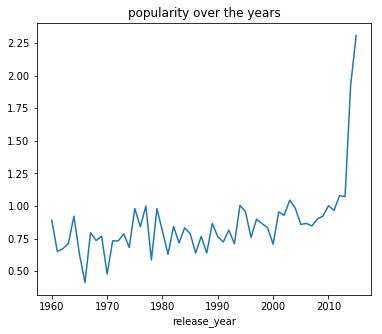

In [20]:
df_clean.groupby('release_year').mean()['popularity'].plot(figsize= (6,5), title = 'popularity over the years')

### the chart shows us the increasing of popularity over the years 

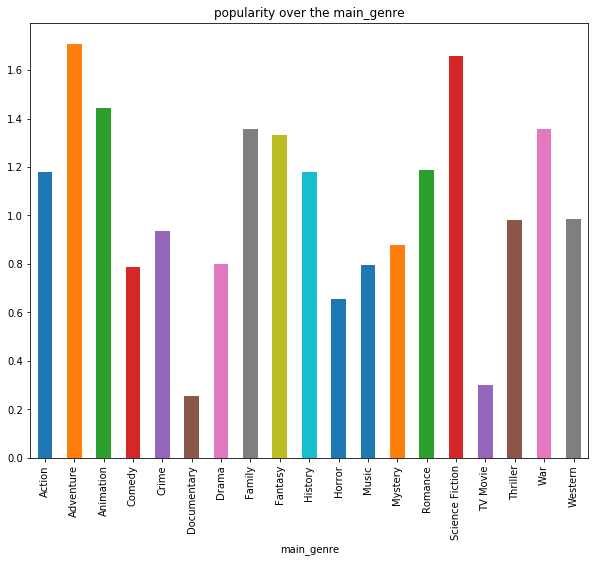

In [21]:
#ploting the most popular main_genre

df_clean.groupby('main_genre').mean()['popularity'].plot(kind='bar', figsize= (10,8), title = 'popularity over the main_genre')

#### adventure is the most popular main_genre

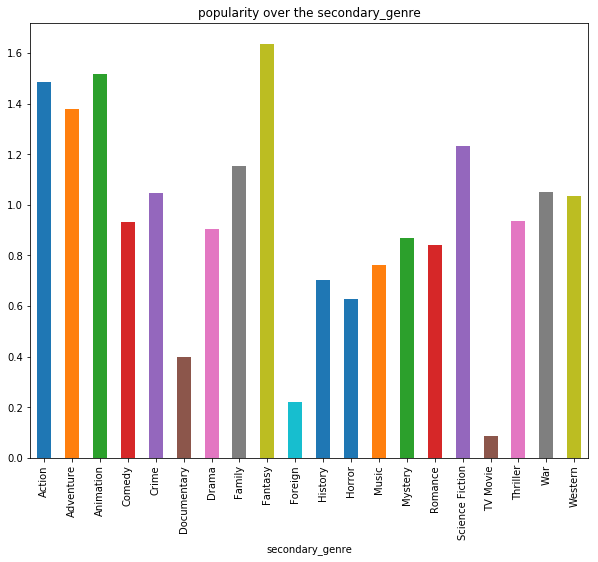

In [22]:
#ploting the most popular secondary_genre

df_clean.groupby('secondary_genre').mean()['popularity'].plot(kind='bar', figsize= (10,8), title = 'popularity over the secondary_genre')

#### fantasy is the most popular secondary_genre

In [23]:
#calculating mean of Popularity of Combined genres
Cgenre_Popularity = df_clean.groupby(['main_genre','secondary_genre'])['popularity'].mean().sort_values(ascending=False)
p = np.array([[Cgenre_Popularity.index.tolist()[:3], Cgenre_Popularity[:3]]])
p.T

array([[[('Romance', 'Family')],
        [3.1581255]],

       [[('Science Fiction', 'Mystery')],
        [2.9440575]],

       [[('Comedy', 'Animation')],
        [2.8363013333333336]]], dtype=object)

#### ('Romance', 'Family') are the most Popular Combined genres!

#### the most popular directors

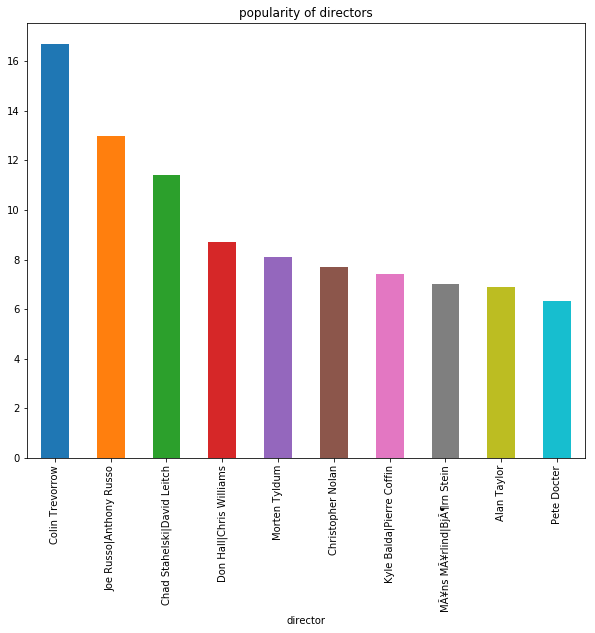

In [24]:
df_clean.groupby('director').mean()['popularity'].sort_values(ascending=False)[:10].plot(kind='bar', figsize= (10,8), title = 'popularity of directors')

### Research Question 2  : What kinds of properties are associated with movies that have high revenues?

In [25]:
# new dataframe to Investigate for the movies with revenues more than 100 million $
df_high_revenues = df_clean[df_clean['revenue'] >= 100000000].sort_values(by='revenue', ascending=False)
df_high_revenues.head()

,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,main_genre,secondary_genre
471,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,8458,7.1,2009,Action,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,5292,7.5,2015,Action,Adventure
2400,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,4654,7.3,1997,Drama,Romance
2012,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,8903,7.3,2012,Science Fiction,Action
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,5562,6.5,2015,Action,Adventure


Text(0,0.5,'revenues (billions)')

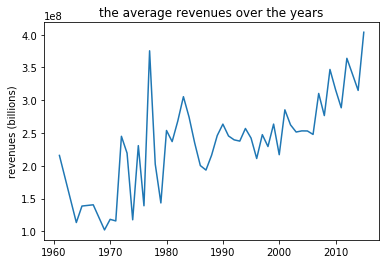

In [26]:
#ploting movies with +100 million $ revenues over the years
plt.plot(df_high_revenues.groupby('release_year')['revenue'].mean())
plt.title('the average revenues over the years')
plt.ylabel('revenues (billions)')

#### movies with +100 million $ revenues over the years, the reason of the deviation in late 70s and is star wars

#### the most 3 years in which the biggest number of movies with +100 million $ revenues came in

In [27]:
df_high_revenues.groupby('release_year')['revenue'].count().sort_values(ascending=False)[:3]

release_year
2011    68
2014    68
2013    61
Name: revenue, dtype: int64

#### the most 3 years with the biggest revenues

In [28]:
df_high_revenues.groupby('release_year').sum()['revenue'].sort_values(ascending=False)[:3]

release_year
2015    22608619899
2012    21474870218
2014    21422082562
Name: revenue, dtype: int64

In [29]:
#the average votes for movies with +100 million $ revenues
df_high_revenues.mean()['vote_average']

6.3815189873417726

#### the average votes for movies with +100 million $ revenues is 6.38

In [30]:
#the average runtime for movies with +100 million $ revenues
df_high_revenues.mean()['runtime']

114.99915611814346

#### the average runtime for movies with +100 million $ revenues is 114 mins 

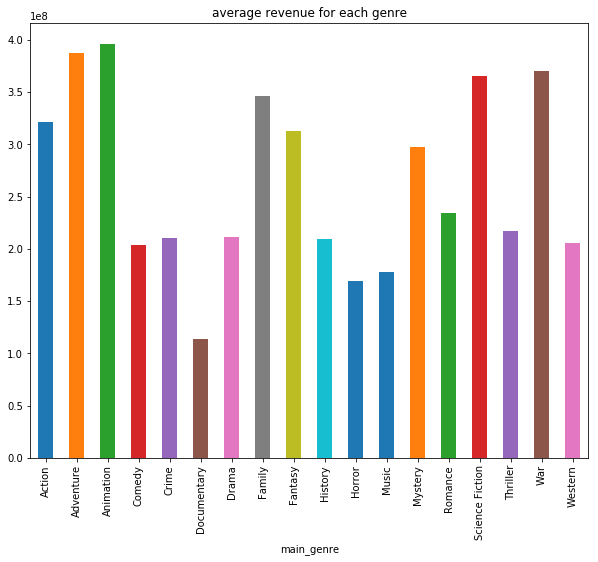

In [31]:
#the main_genre for movies with +100 million $ revenues
df_high_revenues.groupby('main_genre').mean()['revenue'].plot(kind='bar', figsize= (10,8), title = 'average revenue for each genre')

#### form the bar plot we see that animation movies are the most Profitable genre

### Research Question 3 : What kind of directors made the highly rated movies?

In [32]:
# new dataframe to Investigate for the movies with vote_count more than 100 and movies with revenues
df_vote = df_clean[df_clean['vote_count'] >= 100]
df_vote = df_vote[df_vote['revenue'] != 0]
df_vote.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,2608.000000,2.608000e+03,2.608000e+03,2608.000000,2608.000000,2608.000000,2608.000000
mean,1.563136,4.697151e+07,1.500364e+08,110.827837,757.582822,6.315529,2003.018788
std,1.662671,4.620086e+07,2.004224e+08,19.698238,990.252505,0.750671,10.640192
min,0.040858,3.000000e+01,2.000000e+00,42.000000,100.000000,3.300000,1960.000000
25%,0.759632,1.500000e+07,3.548547e+07,97.000000,198.000000,5.800000,1998.000000
50%,1.111487,3.200000e+07,8.550542e+07,107.000000,388.500000,6.300000,2006.000000
75%,1.784542,6.325000e+07,1.803450e+08,121.000000,852.000000,6.900000,2011.000000
max,32.985763,3.800000e+08,2.781506e+09,216.000000,9767.000000,8.400000,2015.000000


### average revenue is 150,036,400$  the average popularity is 1.563136

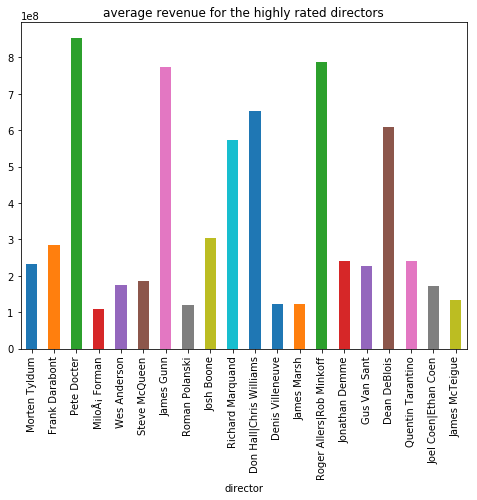

In [33]:
#ploting the average revenues for the highly rated directors
df_high_revenues.groupby('director').mean().sort_values(by='vote_average', ascending=False)['revenue'][:20].plot(kind='bar', figsize= (8,6), title = 'average revenue for the highly rated directors')

##### as we can see, there are 16 directors are above the average revenue

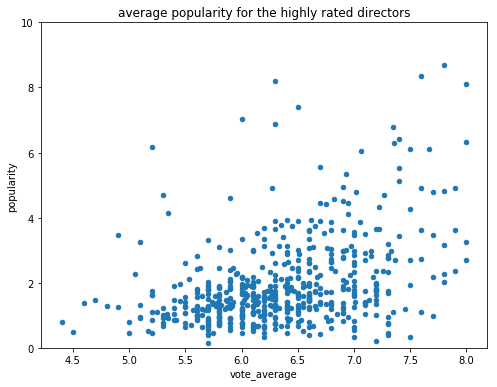

In [34]:
df_high_revenues.groupby('director').mean().plot(kind='scatter',x='vote_average', y='popularity',ylim=[0,10], figsize= (8,6), title = 'average popularity for the highly rated directors')

#### in this scatter we used ylim to avoid the outliers, and now we see that there is the slight relation between the popularity of the director and vote_average of his movies 

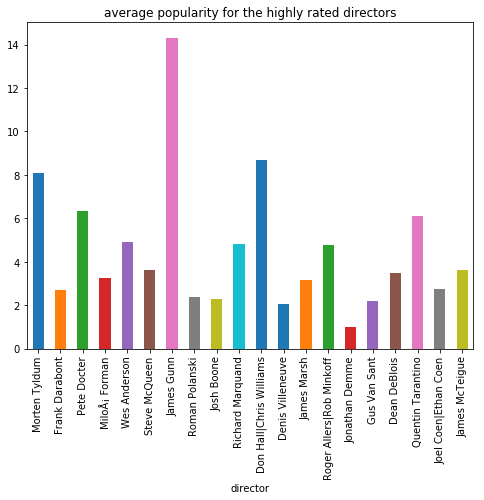

In [35]:
#ploting the average popularity for the highly rated directors
df_high_revenues.groupby('director').mean().sort_values(by='vote_average', ascending=False)['popularity'][:20].plot(kind='bar', figsize= (8,6), title = 'average popularity for the highly rated directors')

#### as we can see, there are 19 directors have popularity above the average!

<a id='Conclusions'></a>
## Conclusions 

> **answer 1**: according to the first plot we found that the movies are more popular in the recent 10 years(2000-2010) which is reasonable because of the use fo the internet, 
also, adventure and sci fi came as the most popular main genres, while fantasy was the most popular secondary_genre, according to the second and the third plots.
and if we combine genre we will find -from the fourth plot-  ('Romance', 'Family') and ('Science Fiction', 'Mystery') are the most popular pair

> **answer 2**: when we look at the movies with high revenues (revenues more than 100 million) we would find some findings like that the revenues considered in relation to the years(the movies in the most recent years made more revenues), and maybe this is because of Inflation or maybe because of the spread of blockbuster movies, because we could see a deviation in late 70s and the reason is star wars!
some facts: 
    - 2011 and 2014 years both have 68 movie made revenues more than 100 million $ 
    - 2015 was the most year the cinema made money with 22608619899$ total revenues
    - the average runtime for movies with +100 million $ revenues is 114 mins
    - the average votes for movies with +100 million $ revenues is 6.38
    - animation movies are the most Profitable genre 

In [36]:
df_clean[df_clean['release_year'] == 1977].sort_values(by='revenue', ascending=False)[:1]

,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,main_genre,secondary_genre
444,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,4428,7.9,1977,Adventure,Action


> **answer 3**: for this question we have found that in the top 20 highly rated directors, there are 16 directors average revenues of their movies are above the average revenue (more than 150,036,400), and 19 directors have popularity above the average!
so. obviously the popular and most Profitable directors made the highly rated movies

#### limitations
    -- in answer 2 as we said, the Conclusions might not be completly accurate because of Inflation or maybe because of the               spread of blockbuster movies 
    -- in answer 3 the dataset does not confirm that every release of every director is listed.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0